# Recorte, extracción y cambio de perspectiva

En esta sección vamos a recortar una de las cartas, extraerla y rotarla para que se vea de frente.

Para eso vamos a:

1. Identificar las cuatros esquinas de la carta en cuestión (Vamos a extraer el rey de picas del frente y rotarlo).
2. Crear una matriz de transformación de cambio perspectiva. Para esto especificaremos los puntos 4 puntos de origen y los 4 puntos de destino y vamos a llamar a `cv2.getPerspectiveTransform(pts1, pts2)` que va a construir la matriz que nos va a servir para realizar esta transformación

#Explicacion

En este ejercicio vamos a extraer una carta (el rey de picas) de una foto de varias cartas sobre la mesa. No solo la recortamos, sino que corregimos la perspectiva para verla como si estuviera tomada de frente, usando transformaciones de OpenCV.



## Instalo e importo librerias

In [4]:
!pip install wget -quiet

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e995fe6d367ca77e85d7f68d8aed0b7517da2b76d77bc858fee7fa03543877f7
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


--2025-06-13 02:51:20--  https://i5.walmartimages.cl/asr/f96a8ded-6bc4-4e88-b3e9-4fd2f18d985b.76d6b946bf9cc6316c48e642faa431e1.png
Resolving i5.walmartimages.cl (i5.walmartimages.cl)... 151.101.2.132, 151.101.66.132, 151.101.130.132, ...
Connecting to i5.walmartimages.cl (i5.walmartimages.cl)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177870 (174K) [image/png]
Saving to: ‘f96a8ded-6bc4-4e88-b3e9-4fd2f18d985b.76d6b946bf9cc6316c48e642faa431e1.png.2’

f96a8ded-6bc4-4e88- 100%[===================>] 173.70K  --.-KB/s    in 0.03s   

2025-06-13 02:51:21 (5.21 MB/s) - ‘f96a8ded-6bc4-4e88-b3e9-4fd2f18d985b.76d6b946bf9cc6316c48e642faa431e1.png.2’ saved [177870/177870]



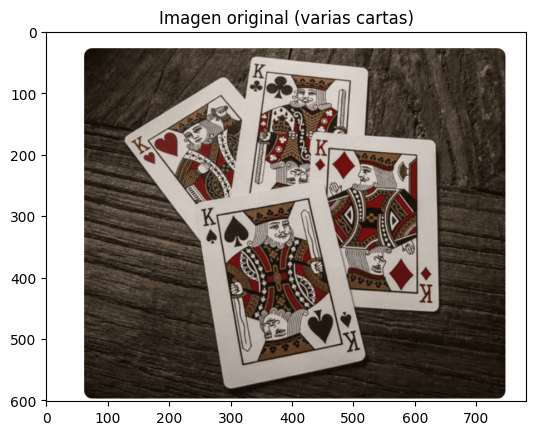

In [10]:
# Importamos las librerías necesarias para procesamiento de imágenes y visualización
import cv2
import numpy as np
import matplotlib.pyplot as plt
import wget

# --------------------------------------
# 1. Leer y mostrar la imagen original
# --------------------------------------
# Cargamos la imagen desde el disco (reemplazar ruta por la tuya si hace falta)

!wget 'https://i5.walmartimages.cl/asr/f96a8ded-6bc4-4e88-b3e9-4fd2f18d985b.76d6b946bf9cc6316c48e642faa431e1.png'
img = cv2.imread('f96a8ded-6bc4-4e88-b3e9-4fd2f18d985b.76d6b946bf9cc6316c48e642faa431e1.png')
#img = cv2.imread('/content/drive/MyDrive/Clases/IMAGEN/007/TEO/Imagenes/cards.jpg')

# OpenCV lee en BGR, así que la convertimos a RGB para mostrar con matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostramos la imagen original
plt.imshow(img)
plt.title("Imagen original (varias cartas)")
#plt.axis('off')
plt.show()

## Elijo puntos de las esquinas (a ojo)

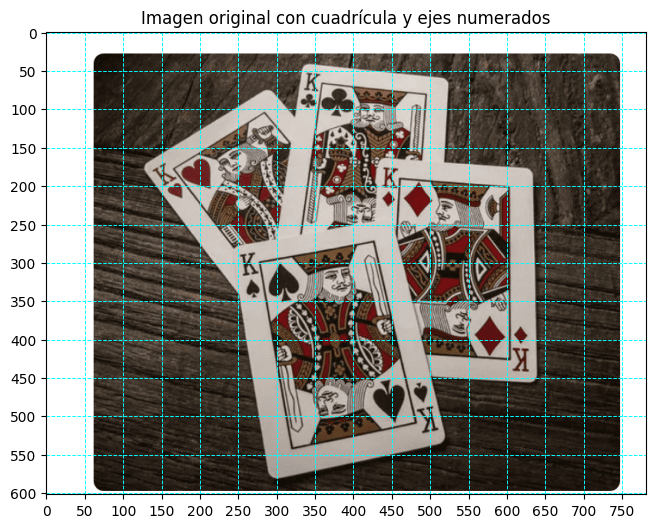

In [16]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Imagen original con cuadrícula y ejes numerados")

# Activar ejes con más números (ticks)
plt.xticks(np.arange(0, img.shape[1], 50))  # Ticks cada 50 píxeles en X
plt.yticks(np.arange(0, img.shape[0], 50))  # Ticks cada 50 píxeles en Y

# Dibujar cuadrícula
plt.grid(color='cyan', linestyle='--', linewidth=0.7)

plt.show()


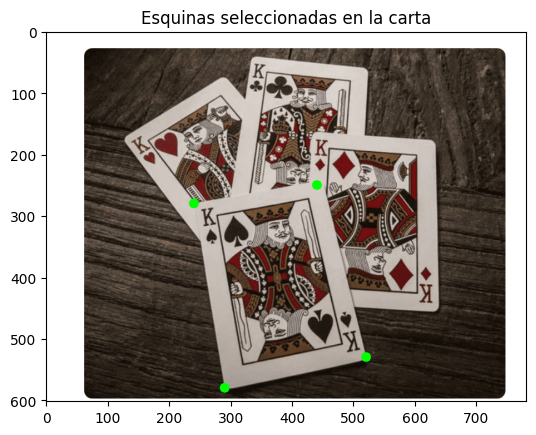

In [24]:
# --------------------------------------
# 2. Seleccionar las esquinas de la carta a extraer
# --------------------------------------
# Para aplicar el cambio de perspectiva, necesitamos saber las coordenadas de las 4 esquinas de la carta.
# Las coordenadas se obtienen a mano mirando la imagen y anotando (x, y) de cada esquina.
# El orden típico es: arriba-izquierda, arriba-derecha, abajo-izquierda, abajo-derecha.
corners = [
    (240, 280),   # Superior izquierda
    (440, 250),   # Superior derecha
    (290, 580),   # Inferior izquierda
    (520, 530)    # Inferior derecha
]

# Dibujamos círculos sobre las esquinas elegidas para visualizar que están bien ubicadas
img_corners = img.copy()
for x, y in corners:
    cv2.circle(img_corners, (x, y), radius=8, color=(0, 255, 0), thickness=-1)  # Círculo verde relleno

plt.imshow(img_corners)
plt.title("Esquinas seleccionadas en la carta")
#plt.axis('off')
plt.show()

## Creamos imagen con nueva perspectiva (getPerspectiveTransform de opencv)

In [25]:
# --------------------------------------
# 3. Crear la matriz de transformación de perspectiva
# --------------------------------------
# Queremos transformar la carta para verla como si estuviera de frente. Para eso, especificamos:
# - Los 4 puntos originales de la carta en la imagen (corners)
# - Los 4 puntos de destino en la imagen final (rectángulo plano)
# Elegimos el tamaño final de la carta recortada (por ejemplo, 250x350 píxeles)
w, h = 250, 350

# Creamos los arrays de puntos origen y destino como float32
pts1 = np.float32(corners)
pts2 = np.float32([
    [0, 0],     # Esquina superior izquierda del recorte
    [w, 0],     # Esquina superior derecha
    [0, h],     # Esquina inferior izquierda
    [w, h]      # Esquina inferior derecha
])

# Obtenemos la matriz que transforma los puntos de la carta a un rectángulo perfecto
matrix = cv2.getPerspectiveTransform(pts1, pts2)

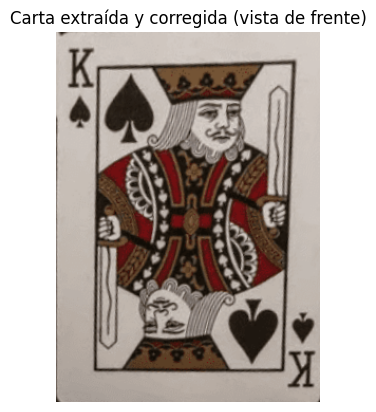

In [26]:
# --------------------------------------
# 4. Aplicar la transformación de perspectiva (warpPerspective)
# --------------------------------------
# Ahora aplicamos la transformación para "recortar" y corregir la perspectiva.
img_output = cv2.warpPerspective(img, matrix, (w, h))

# Mostramos el resultado final: la carta extraída y vista de frente
plt.imshow(img_output)
plt.title("Carta extraída y corregida (vista de frente)")
plt.axis('off')
plt.show()


#PRACTICA PERSPECTIVA

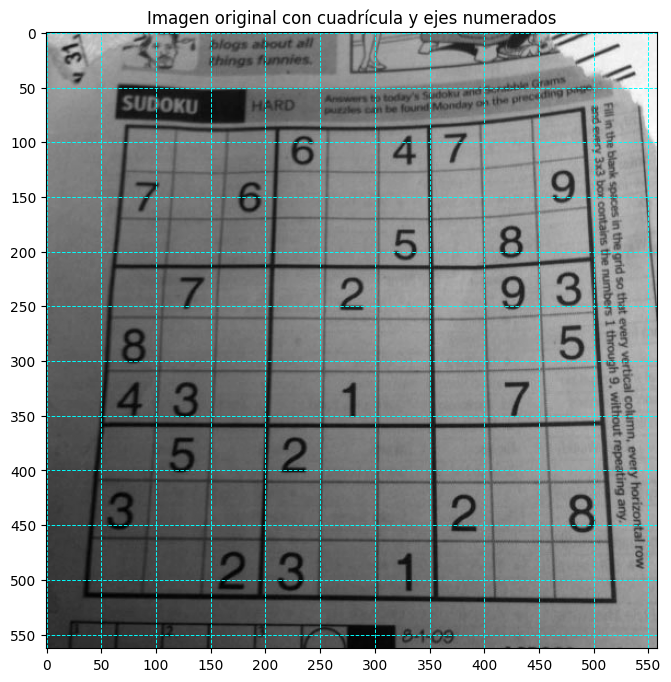

In [27]:
# --- BLOQUE 1: DESCARGA Y VISUALIZACIÓN DE IMAGEN CON CUADRÍCULA ---

import cv2  # Librería principal para procesamiento de imágenes
import numpy as np  # Para trabajar con arrays y coordenadas
import requests  # Para descargar imágenes directamente de internet
import matplotlib.pyplot as plt  # Para visualizar la imagen de forma cómoda

# 1. Descargar imagen desde internet usando requests
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png"  # Imagen de un sudoku en perspectiva
headers = {'User-Agent': 'Mozilla/5.0'}  # Cabecera para evitar bloqueos del servidor
resp = requests.get(url, headers=headers)  # Descargar la imagen
resp.raise_for_status()  # Si la descarga falla, se interrumpe con un error

# 2. Convertir los datos descargados a un array de NumPy para poder trabajar con OpenCV
img_arr = np.asarray(bytearray(resp.content), dtype=np.uint8)

# 3. Decodificar el array de bytes como imagen, en escala de grises (es suficiente para este ejemplo)
img = cv2.imdecode(img_arr, cv2.IMREAD_GRAYSCALE)  # Leemos en escala de grises por simplicidad

# 4. Visualizar la imagen con matplotlib, mostrando cuadrícula y ejes numerados para facilitar la selección de esquinas
plt.figure(figsize=(8, 8))  # Tamaño grande para ver bien los detalles
plt.imshow(img, cmap='gray')  # Mostrar la imagen en escala de grises
plt.title("Imagen original con cuadrícula y ejes numerados")  # Título descriptivo

# Mostrar ticks cada 50 píxeles en X e Y para ayudar a identificar las coordenadas
plt.xticks(np.arange(0, img.shape[1], 50))
plt.yticks(np.arange(0, img.shape[0], 50))

# Dibujar una cuadrícula cyan, líneas finas y discontinuas
plt.grid(color='cyan', linestyle='--', linewidth=0.7)

plt.show()  # Mostrar la imagen con cuadrícula y ejes



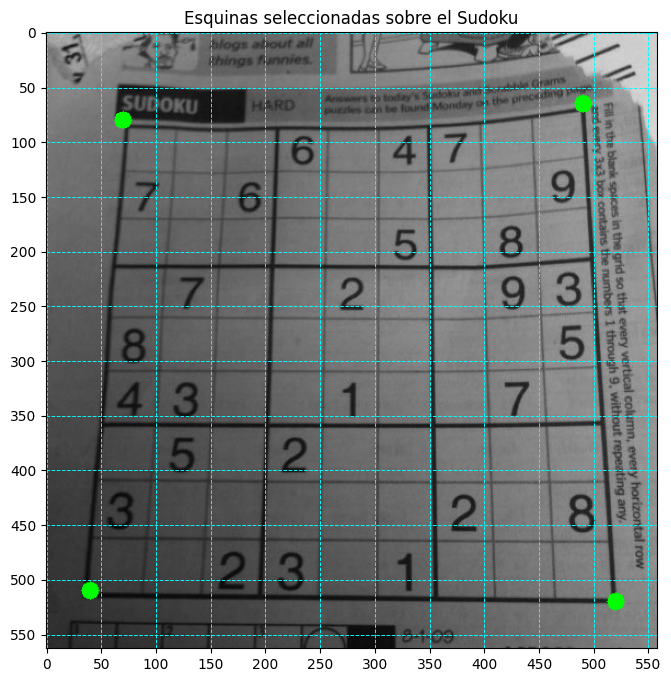

In [40]:
# --- BLOQUE 2: SELECCIÓN Y VISUALIZACIÓN DE ESQUINAS (CORNERS) ---

# 1. Elegimos a mano (a ojo, con ayuda de la cuadrícula) las 4 esquinas del sudoku que queremos enderezar
# El orden debe ser: superior izquierda, superior derecha, inferior izquierda, inferior derecha
corners = [
    (70, 80),   # Superior izquierda
    (490, 65),   # Superior derecha
    (40, 510),   # Inferior izquierda
    (520, 520)    # Inferior derecha
]

# Si querés máxima precisión, ajustá los valores según lo que veas en tu notebook

# 2. Hacemos una copia de la imagen para dibujar los puntos sobre ella
img_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Convertimos a RGB solo para dibujar círculos de color

# 3. Dibujamos un círculo verde sobre cada esquina seleccionada
for x, y in corners:
    cv2.circle(img_corners, (x, y), radius=8, color=(0, 255, 0), thickness=-1)  # Círculo relleno

# 4. Visualizamos la imagen con los puntos de esquina y la cuadrícula de fondo
plt.figure(figsize=(8, 8))
plt.imshow(img_corners)
plt.title("Esquinas seleccionadas sobre el Sudoku")
plt.xticks(np.arange(0, img.shape[1], 50))
plt.yticks(np.arange(0, img.shape[0], 50))
plt.grid(color='cyan', linestyle='--', linewidth=0.7)
plt.show()

# Fin del BLOQUE 2


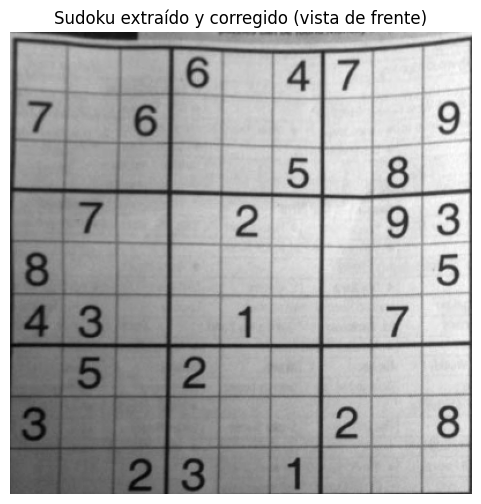

In [41]:
# --- BLOQUE 3: TRANSFORMACIÓN DE PERSPECTIVA Y RECORTE DEL SUDOKU ---

# 1. Definimos el tamaño final que queremos para la imagen recortada
# Por ejemplo, 400 x 400 píxeles para que quede cuadrado y bien definido
w, h = 400, 400

# 2. Creamos los arrays de puntos originales (corners) y destino (esquinas del cuadrado final)
pts1 = np.float32(corners)  # Esquinas originales seleccionadas
pts2 = np.float32([
    [0, 0],       # Superior izquierda en el recorte final
    [w, 0],       # Superior derecha
    [0, h],       # Inferior izquierda
    [w, h]        # Inferior derecha
])

# 3. Calculamos la matriz de transformación de perspectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# 4. Aplicamos la transformación a la imagen original para "enderezar" el sudoku
img_warped = cv2.warpPerspective(img, matrix, (w, h))

# 5. Mostramos el resultado final: el sudoku extraído y visto perfectamente de frente
plt.figure(figsize=(6,6))
plt.imshow(img_warped, cmap='gray')
plt.title("Sudoku extraído y corregido (vista de frente)")
plt.axis('off')
plt.show()

# Fin del BLOQUE 3
